# Homework 3: Coding

**Due Tuesday October 4th, 11:59pm.**
**Note: Only Question 3 has code to submit for this assignment**
**Submit hw3.ipynb file to Gradescope (you may submit as many times as you'd like before the deadline).**

In [1]:
"""
Import libraries that you might require.

"""
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

np.__version__


'1.21.6'

In [2]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

"""
from google.colab import files
uploaded = files.upload()
! unzip hw3_house_sales.zip

Saving hw3_house_sales.zip to hw3_house_sales.zip
Archive:  hw3_house_sales.zip
  inflating: X_test.csv              
  inflating: __MACOSX/._X_test.csv   
  inflating: X_train.csv             
  inflating: __MACOSX/._X_train.csv  
  inflating: y_test.csv              
  inflating: __MACOSX/._y_test.csv   
  inflating: y_train.csv             
  inflating: __MACOSX/._y_train.csv  


# Question 3: Logistic Regression and Gradient Descent

Implement the following functions for question 1. Please use the sklearn implementation of linear regression or other imports beyond those listed above.

In [3]:
"""
load data, a const dimension (for weight b) is already included in X.
"""
# X_train = pd.read_csv('X_train.csv')
# X_test = pd.read_csv('X_test.csv')
# y_train = pd.read_csv('y_train.csv')
# y_test = pd.read_csv('y_test.csv')

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_test.head(5)

(800, 11)
(400, 11)
(800, 1)
(400, 1)


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,YrSold,const
0,11851,7,5,1990,1990,1442,2,3,1,2009,1
1,9920,7,5,1996,1997,2013,2,3,1,2007,1
2,11216,8,5,2006,2006,1489,2,3,1,2006,1
3,8244,7,5,2004,2004,1720,2,3,1,2007,1
4,11787,7,5,1996,1997,2398,2,3,1,2007,1


In [4]:
"""
Do some data preparation, convert dataframe to numpy array
"""
n_features = X_train.shape[1]

w = np.zeros((1, n_features))

# turn dataframe to np array
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

m_train =  X_train.shape[0]
m_test =  X_test.shape[0]

**Logistic regression with scikit** Fill in the logisticRegressionScikit() function. Report the weights, training accuracy, and the test accuracy. We will not use any penalty here, so set the parameters penalty = 'none', solver = 'saga'.Also, we will use 2000 iterations for a fair comparison to later algorithms, so also set the parameter max_iter=2000.

In [5]:
def LogisticRegressionScikit(X_train, y_train, X_test, y_test):

    """
    Computes logistic regression with scikit-learn.
    
    Args:
        X_train: feature matrix of training set, np array of (n, p)
                 where n is the number of training observations, 
                 p is the number of features
        y_train: truth value of training set, np array of (n, 1)

        X_test: feature matrix of test set, np array of (m, p)
                 where m is the number of test observations,
                 p is the number of features
        y_test: truth value of test set, np array of (m, 1)

    Returns:  
        w: numpy array of learned coefficients
        y_pred: numpy array of predicted labels for the test data
        score: accuracy of test data
    """
    clf = LogisticRegression(
        penalty='none', solver='saga', max_iter=2000, fit_intercept=False
        )
    clf = clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred_test)
    return clf.coef_, y_pred_test, score

In [6]:
"""
Results for logistic regression Scikit function
"""
LogisticRegressionScikit(X_train, y_train, X_test, y_test)

(array([[ 8.77264213e-05,  3.21084335e-05, -8.33532718e-06,
         -6.45684067e-04, -1.03202161e-03,  3.75011284e-03,
          9.91317582e-06, -7.39297928e-06, -3.97849372e-06,
         -1.54730678e-03, -7.71042642e-07]]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1,

**Logistic regression with simple gradient descent** Fill in the LogisticRegressionGD() function. To do that, two helper functions sigmoid_activation(), to calculate the sigmoid function result, and model_optimize(), to calculate the gradient of w, will be needed. Both helper functions can be used in the following AdaGrad optimization function. Use a learning rate of $10^{−4}$, run with 2000 iterations. Report the weights and accuracy. Keep track of the accuracy every 100 iterations in the training set. It will be used later.

In [7]:
def sigmoid_activation(x):
    """
    Calculates the sigmoid function.
    
    Args:
        x: numpy array of input, of shape (1, n)
           where n is the number of observations
        
    Returns:
        final_result: numpy array of sigmoid result, of shape (1, n)
                      where n is the number of observations
    """

    value = 1/(1+ np.exp(-x))
    return value

We add a predict() function here to threshold probability prediction into binary classification

In [56]:
def predict(final_pred):
    """
    Predict labels from probability to 0/1 label, threshold 0.5.
    
    Args:
        final_pred: numpy array of probabilty that each sample belonging to class 1, of shape (1, n)
                    where n is the number of observations 
        
    Returns:
        y_pred: numpy array of label of each sample, of shape (1, n)
                where n is the number of observations
    """
    return (final_pred>0.5).astype(int)

**Remember to derive the gradient, write down the weight update formula, and hand in them to the latex submission!**

In [104]:
def model_optimize(w, X, Y):
    
    """
    Calculates gradient of the weights.
    
    Args:
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
           p is the number of features
        Y: numpy array of training labels of shape (n, 1)
        w: numpy array of weights of shape (1, p)
    Returns:
        dw: the gradient of the weights of shape (1, p)
    """
    sigs = sigmoid_activation(np.matmul(X, w.T)).reshape(-1,1)
    dw = (np.matmul((Y-sigs).T, X))/X.shape[0]
    return dw

In [105]:
# helper function
def get_accuracy(w, X, y):
    y_pred = sigmoid_activation(np.matmul(X, w.T)).reshape(-1,1)
    y_pred_classes = predict(y_pred)
    return y_pred, y_pred_classes, accuracy_score(y, y_pred_classes)

In [106]:
def LogisticRegressionGD(w, X, Y, learning_rate, num_iterations):
    """
    Uses batch gradient descent to update weights for logistic regression.

    Args:       
        w: numpy array of initial weights of shape (1, p)
           where p is the number of features
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
        Y: numpy array of training labels of shape (n, 1)
        learning_rate: float number learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:  
        coeff: numpy array of weights after optimization of shape (1, p)
        accuracies: a list of accuracy at each hundred's iteration. With 2000 iterations, 
                    accuracies should be a list of size 21 (starting from 0)


    """
    acc_lst = [get_accuracy(w, X, Y)[2]]
    for i in range(num_iterations):
        dw = model_optimize(w, X, Y)
        w = w + learning_rate * dw
        if ((i+1)%100==0):
            acc = get_accuracy(w, X, Y)[2]
            acc_lst.append(acc)
    return w, acc_lst

**Logistic regression with AdaGrad** Fill in the LogisticRegressionAda() function. Use a learning rate of $10^{−4}$, run with 2000 iterations. Report the weights and accuracy. Keep track of the accuracy every 100 iterations in the training set. It will be used later.

In [107]:
def LogisticRegressionAda(w, X, Y, learning_rate, num_iterations):

    """
    Use AdaGrad to update weights.
    
    Args:       
        w: numpy array of initial weights of shape (1, p)
           where p is the number of features
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
        Y: numpy array of training labels of shape (n, 1)
        learning_rate: float number learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:  
        coeff: numpy array of weights after optimization of shape (1, p)
        accuracies: a list of accuracy at each hundred's iteration. With 2000 iterations, 
                    accuracies should be a list of size 21 (starting from 0)
    """

    acc_lst = [get_accuracy(w, X, Y)[2]]
    for i in range(num_iterations):
        dw = model_optimize(w, X, Y)
        if i!=0:
            dw_t = np.concatenate((dw_t, dw), axis=0)
        else:
            dw_t = dw
        lr = learning_rate/((dw_t**2).sum(axis=0))**0.5
        w = w + lr * dw
        if ((i+1)%100==0):
            acc = get_accuracy(w, X, Y)[2]
            acc_lst.append(acc)
    return w, acc_lst

Now we start to use our dataset and construct model.

Model construction for GD logistic regression.

In [113]:
"""
Results for gradient descent weight update
"""

# Gradient Descent
coeff_GD, acc_GD = LogisticRegressionGD(w, X_train, y_train, learning_rate=0.0001,num_iterations=2000)

# predict probability, predict label
y_pred_proba_trn, y_pred_trn, trn_acc = get_accuracy(coeff_GD, X_train, y_train)
y_pred_proba_test, y_pred_test, test_acc = get_accuracy(coeff_GD, X_test, y_test)

trn_acc, test_acc, coeff_GD

(0.66625, 0.67, array([[-3.22556760e-02,  5.19295454e-02, -1.11428918e-02,
         -3.29074939e-01, -9.76324768e-01,  3.46687457e+00,
          1.54510258e-02, -1.55937838e-02, -6.72916022e-03,
         -1.82143744e+00, -9.07742499e-04]]))

Model construction for AdaGrad logistic regression.

In [112]:
"""
Results for AdaGrad Descent weight update
Please comment out these statements before converting to .py file and submitting.
"""
coeff_Ada, acc_Ada = LogisticRegressionAda(w, X_train, y_train, learning_rate=0.0001, num_iterations=2000)

# predict probability, predict label
y_pred_proba_trn, y_pred_trn, trn_acc = get_accuracy(coeff_Ada, X_train, y_train)
y_pred_proba_test, y_pred_test, test_acc = get_accuracy(coeff_Ada, X_test, y_test)

trn_acc, test_acc, coeff_Ada

(0.82375, 0.815, array([[ 8.56662093e-05,  7.32614055e-03, -4.06504586e-03,
         -1.84267619e-04, -1.05933061e-03,  4.09573947e-03,
          7.04325844e-03, -7.02781789e-03, -6.96851681e-03,
         -2.22061428e-03, -2.22196570e-03]]))

Plot accuracy vs iteration for GD and AdaGrad. Compare the performance difference. Briefly explain the reason.

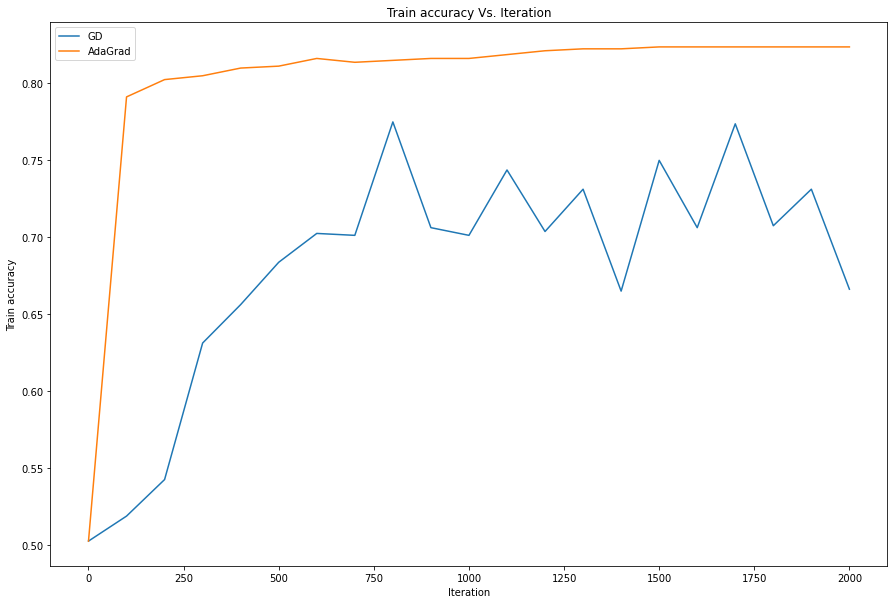

In [114]:
"""
Plot accuracy vs iteration for GD and AdaGrad
"""
plt.figure(figsize=(15,10))
plt.plot(range(0,2100, 100), acc_GD, label="GD")
plt.plot(range(0,2100, 100), acc_Ada, label="AdaGrad")
plt.title("Train accuracy Vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Train accuracy")
plt.legend(loc="bottom right")